<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/R_DATAVIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화

## 1. COVID-19 시각화

#### (1) 관련 패키지 불러오기

In [1]:
# https://cran.r-project.org/web/packages/COVID19/index.html
# Install COVID19
install.packages("COVID19")
# 국가코드는 아래 사이트에서 찾음(국제표준)
#  https://github.com/covid19datahub/COVID19/blob/master/inst/extdata/db/ISO.csv

# Load COVID19
library(COVID19)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
options(warn=-1,repr.plot.width = 10, repr.plot.height = 6)

#### (2) 국가별 선그래프
* 10개국 선택 : 한국, 이태리, 일본, 미국, 프랑스, 러시아, 독일, 베트남, 브라질, 독일, 스페인
* 중국은 없어서 제외

In [3]:
COVID = covid19(c("KOR", "ITA", "JPN", "USA","FRA", "RUS",
                  "VNM", "BRA", "DEU", "ESP"), level=1, verbose = FALSE)

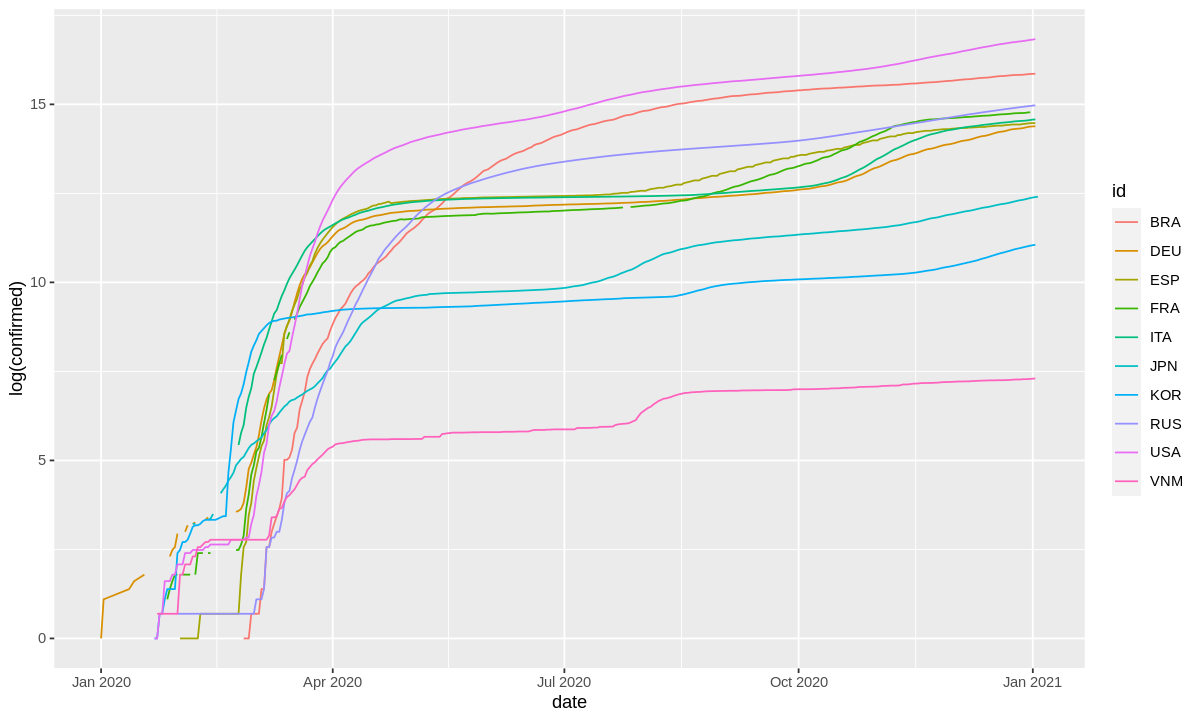

In [6]:
# 데이터의 선그래프 : 로그변환 : 일부국가가 지나치게 커서 로그변환 
ggplot(COVID, aes(date,log(confirmed), colour=id)) +
  geom_line()

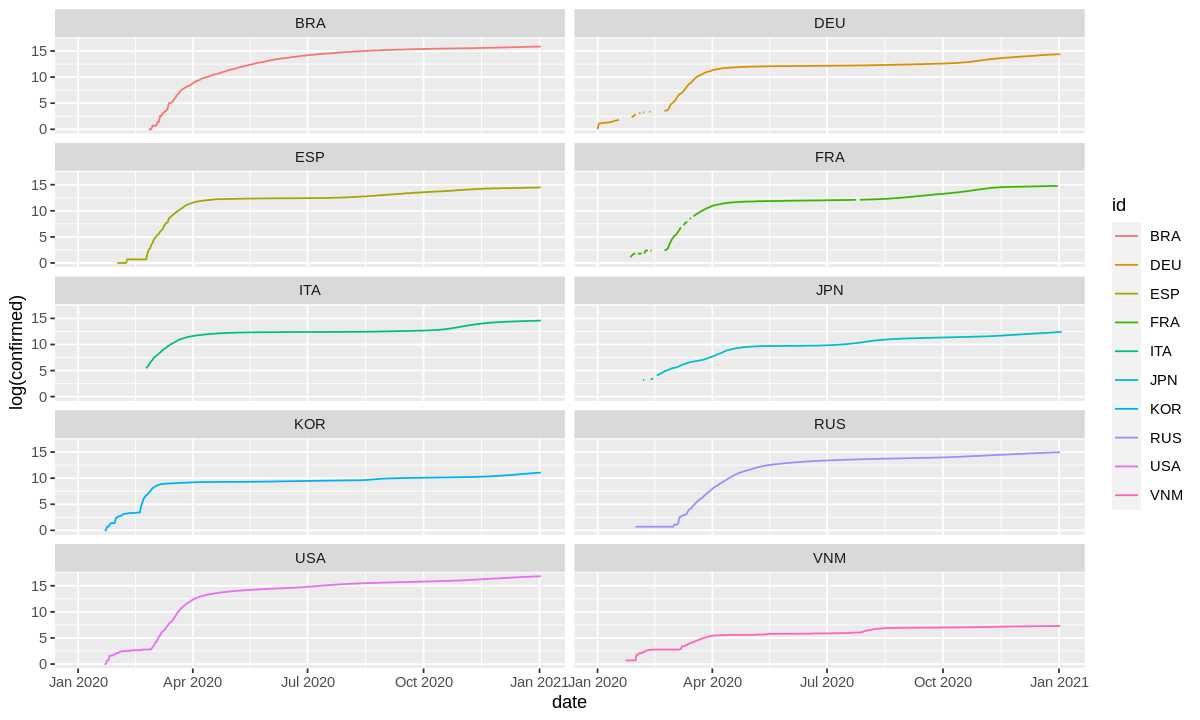

In [7]:
# 데이터의 선그래프 : 로그변환 : 일부국가가 지나치게 커서 로그변환 
ggplot(COVID, aes(date,log(confirmed), colour=id)) +
    geom_line() +
    facet_wrap(~ id, ncol = 2)

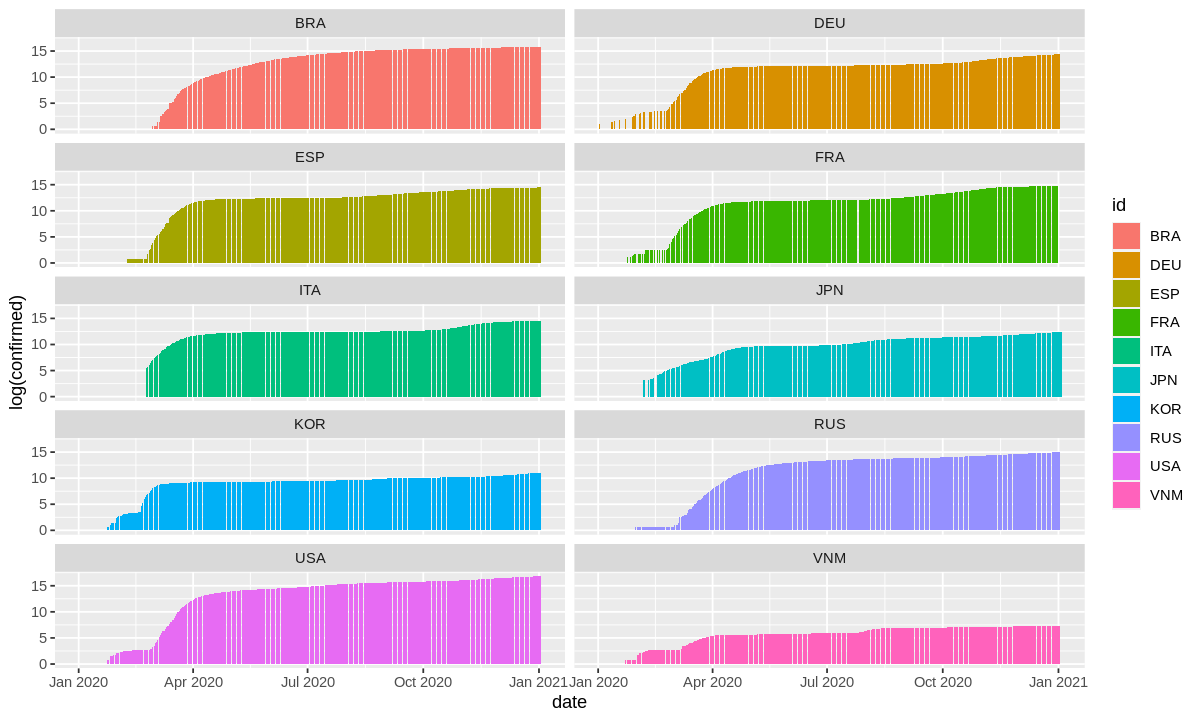

In [8]:
ggplot(COVID, aes(date,log(confirmed), fill=id)) +
  geom_bar(stat="identity") +
  facet_wrap(~ id, ncol = 2)

`summarise()` ungrouping output (override with `.groups` argument)



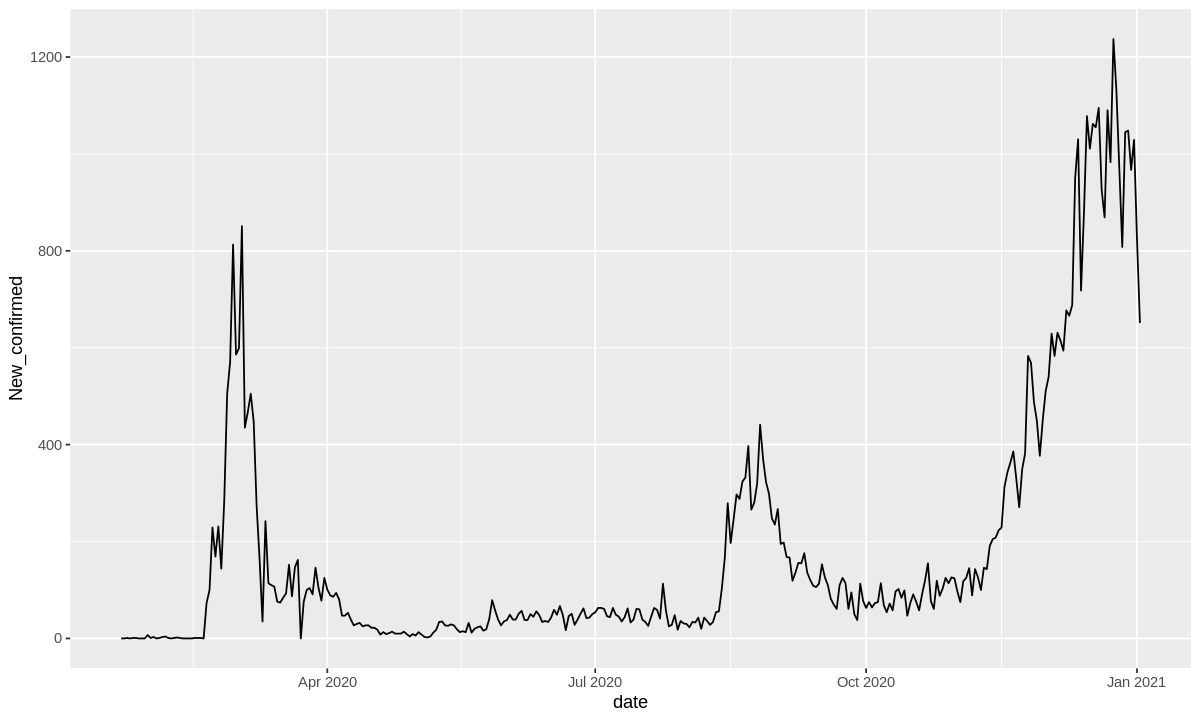

In [19]:
# 한국 데이터 추출
COVID_KR = COVID %>% filter(id == "KOR") %>% select(c(id, date, confirmed)) 
 nn = COVID_KR  %>% summarise(n = n())
 nn1 = nn$n
# 신규 확진자 계산
COVID_KR$New_confirmed = c(0,COVID_KR$confirmed[2:nn1]-COVID_KR$confirmed[1:(nn1-1)])
ggplot(COVID_KR, aes(date,New_confirmed)) + geom_line()

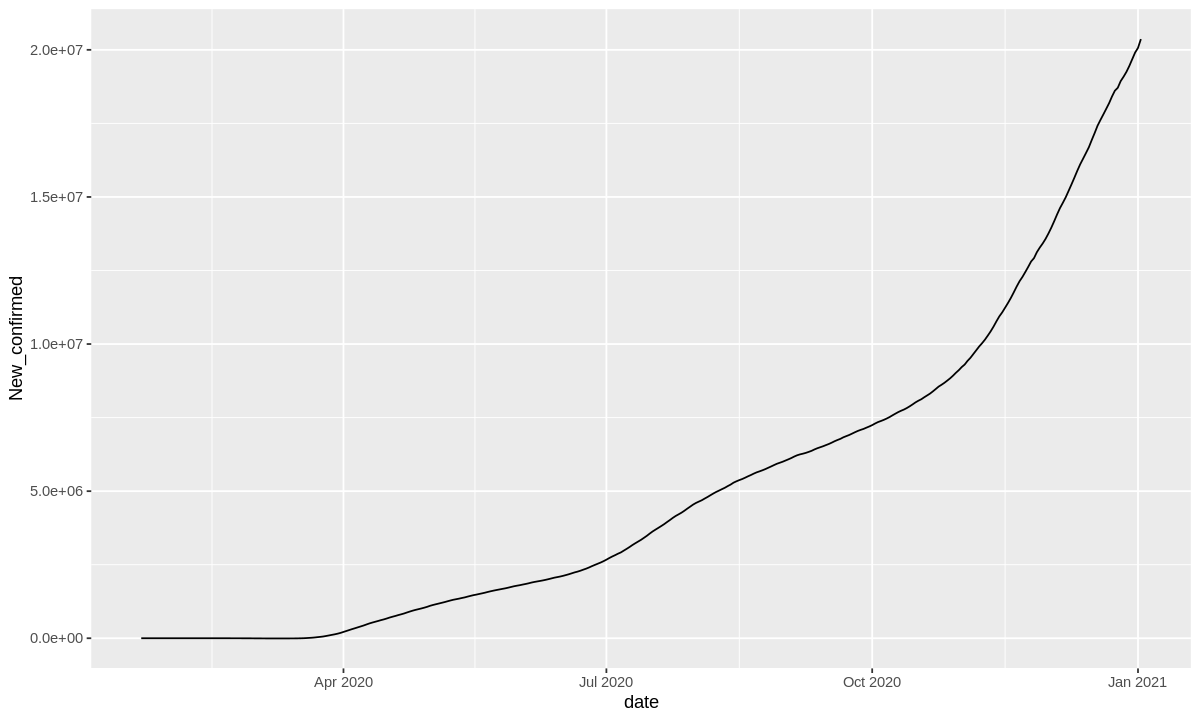

In [30]:
# 미국 데이터 추출과신규 확진자 계산 
COVID_USA = COVID %>% filter(id == "USA") %>% select(c(id, date, confirmed)) 
COVID_USA$New_confirmed = c(0,COVID_USA$confirmed[2:nn1]-COVID_USA$confirmed[1:(nn1-1)])

# 신규 확진자 계산
COVID_USA$New_confirmed = c(0,COVID_USA$confirmed[2:nn1]-COVID_KR$confirmed[1:(nn1-1)])
ggplot(COVID_USA, aes(date,New_confirmed)) + geom_line()

## 2. 산점도

In [31]:
#install.packages("tidyverse")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



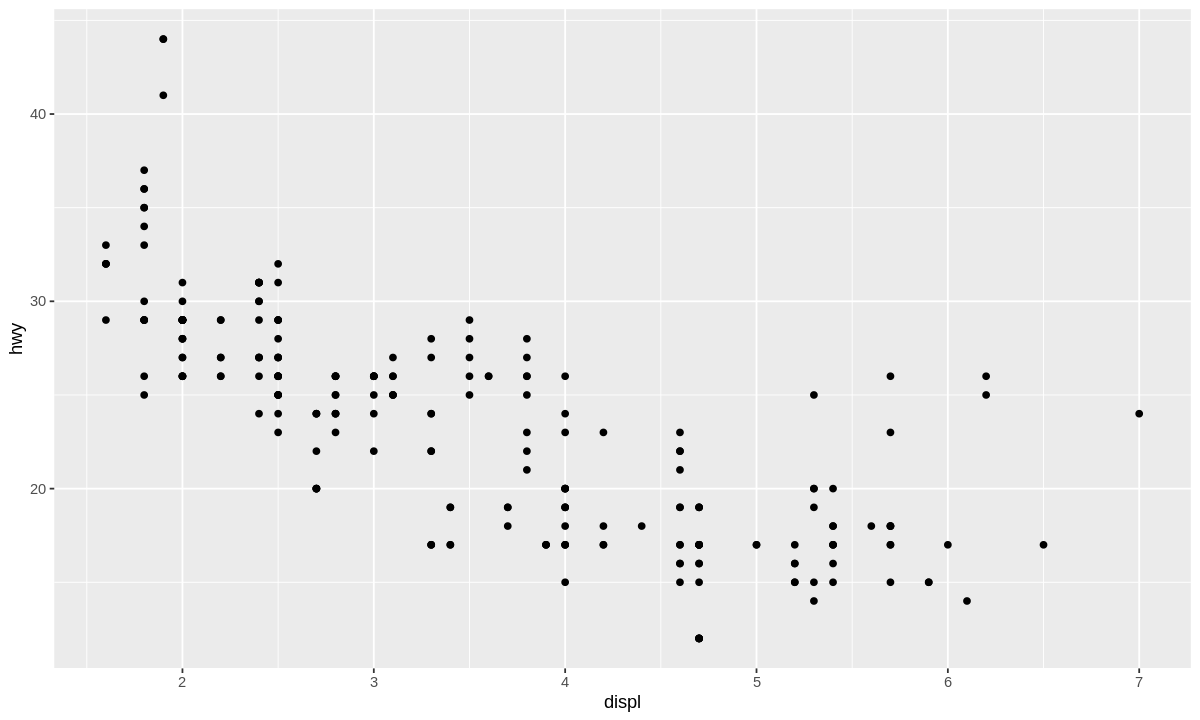

In [32]:
ggplot(data=mpg) + geom_point(aes(x=displ, y=hwy))

In [33]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


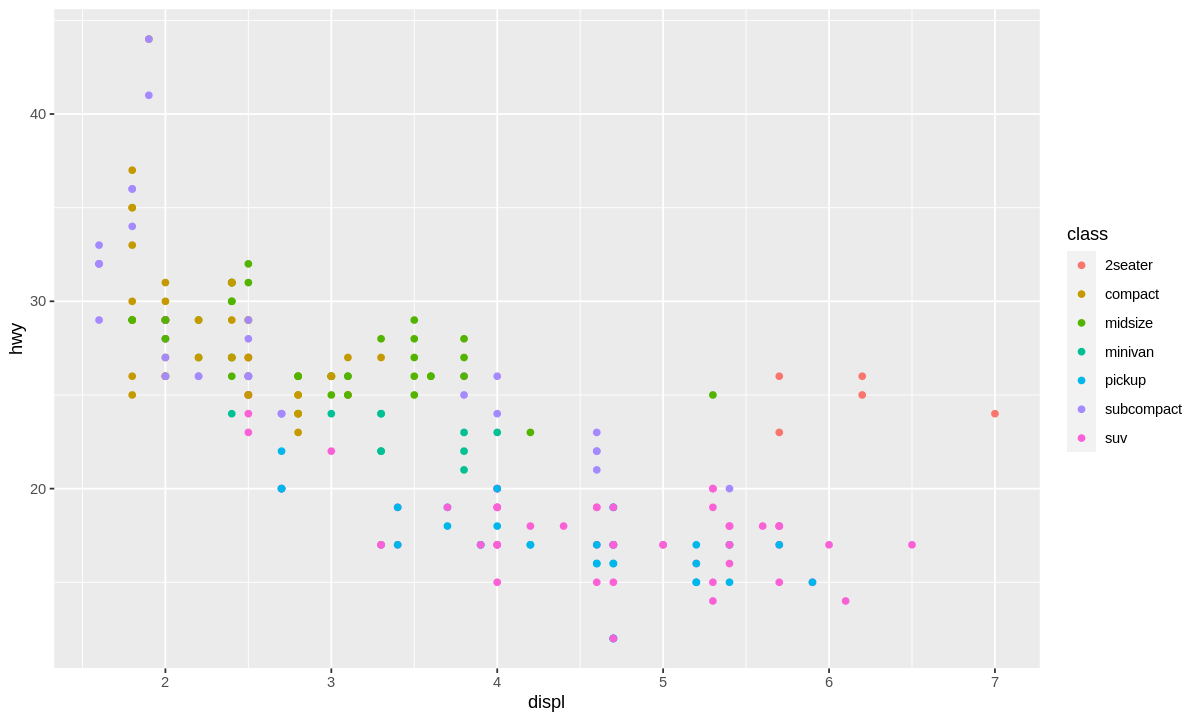

In [34]:
ggplot(data=mpg) + geom_point(aes(x=displ, y=hwy, color=class))

`geom_smooth()` using formula 'y ~ x'



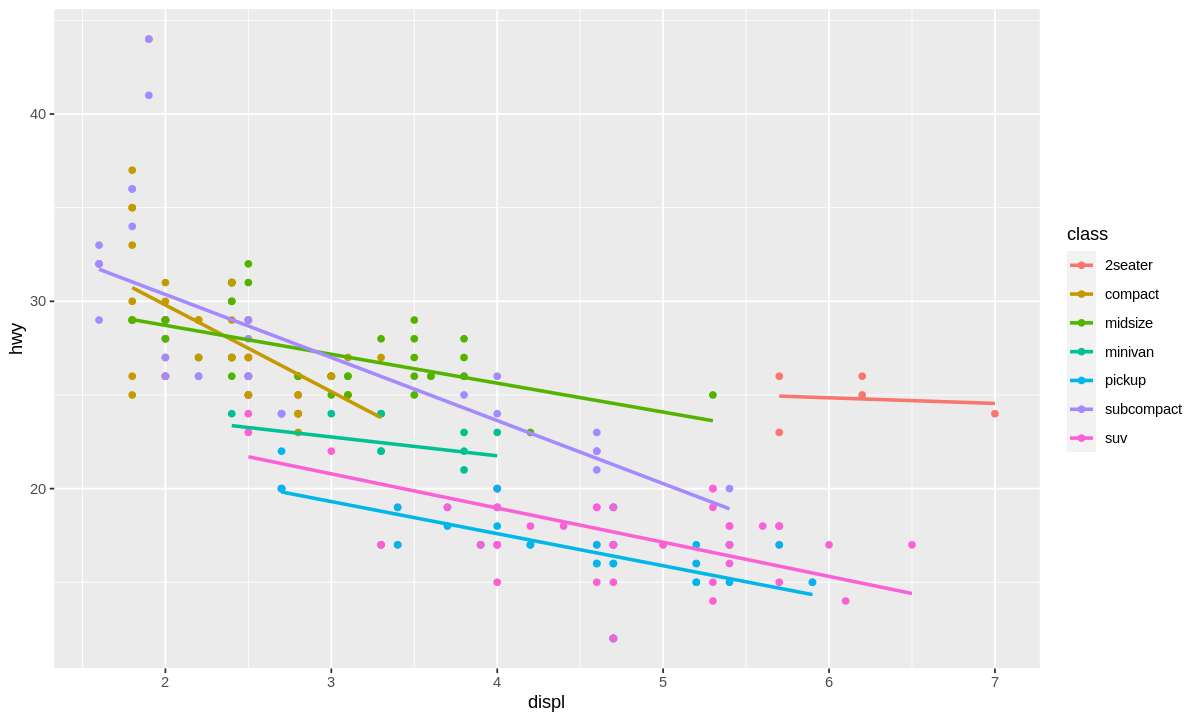

In [38]:
ggplot(data=mpg, aes(x=displ, y=hwy)) + geom_point(aes(color=class)) +
  geom_smooth(aes(color=class), method="lm", se=FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



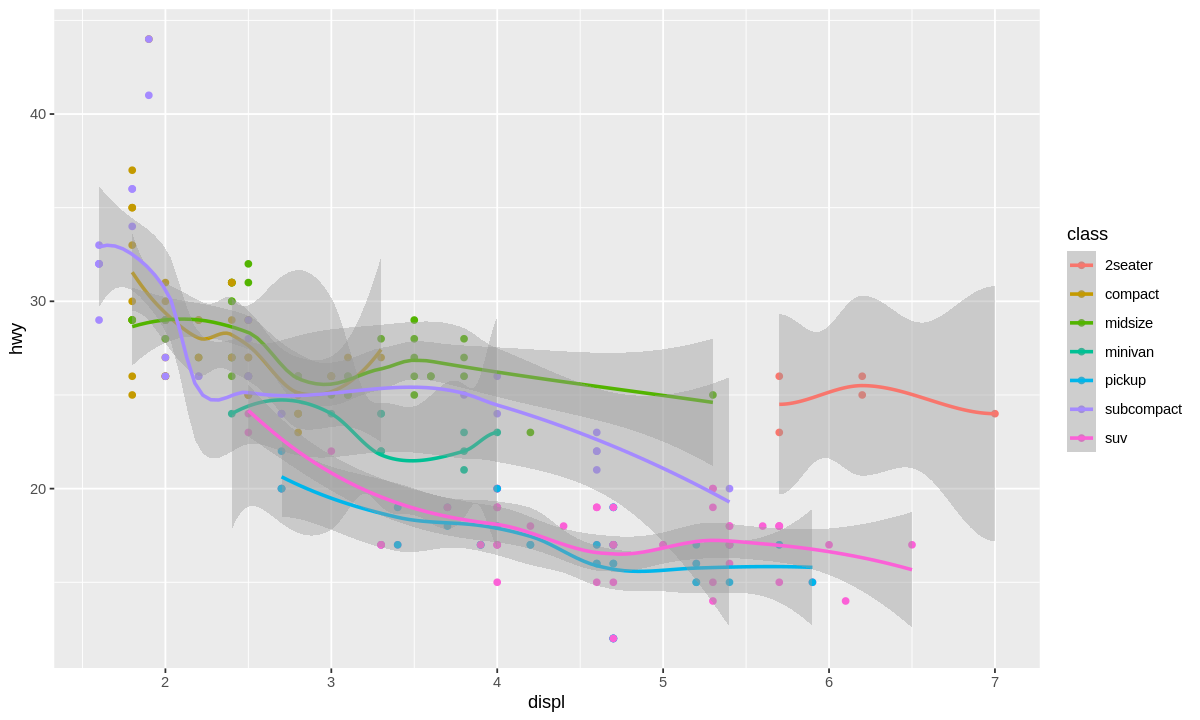

In [36]:
ggplot(data=mpg, aes(x=displ, y=hwy)) + geom_point(aes(color=class)) +
  geom_smooth(aes(color=class))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



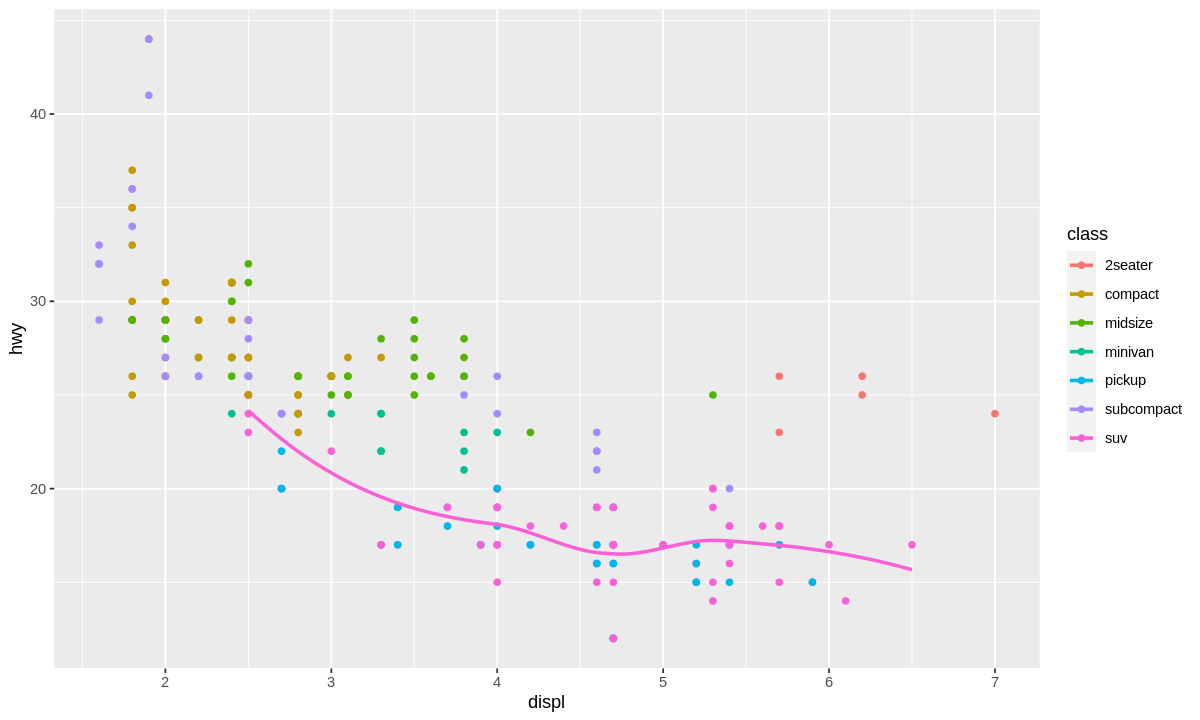

In [39]:
ggplot(data=mpg, aes(x=displ, y=hwy)) + geom_point(aes(color=class)) +
  geom_smooth(data = filter(mpg, class=="suv"), se=FALSE, aes(color=class))

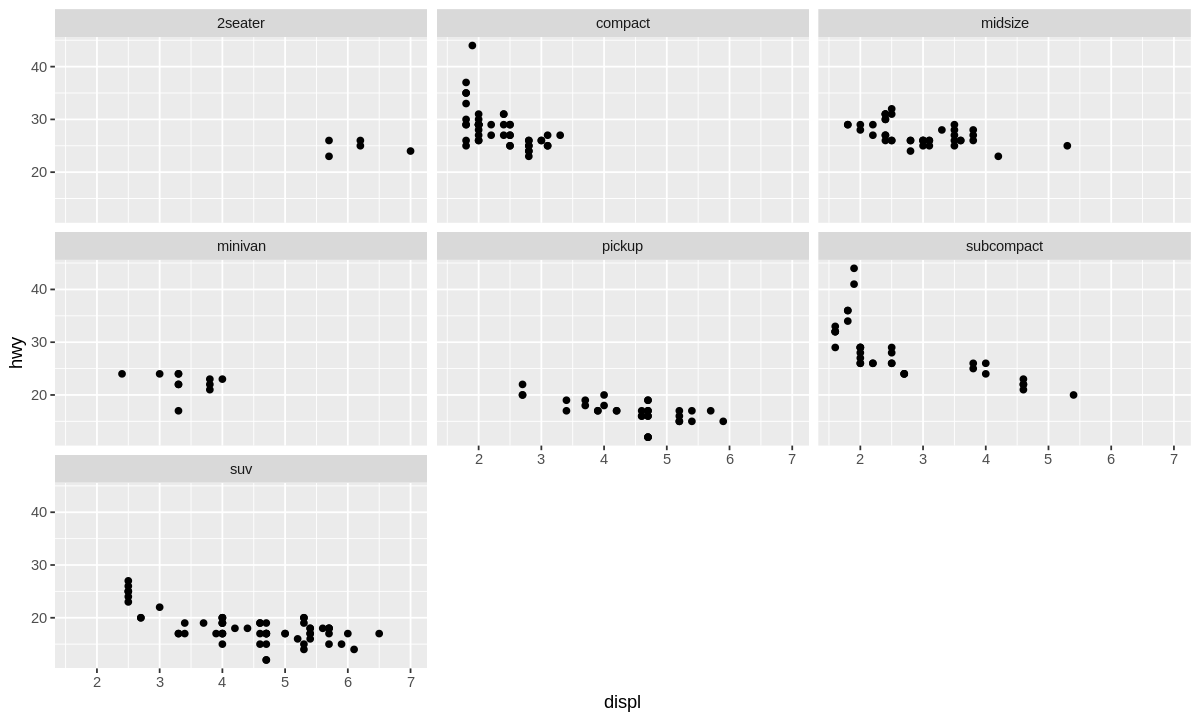

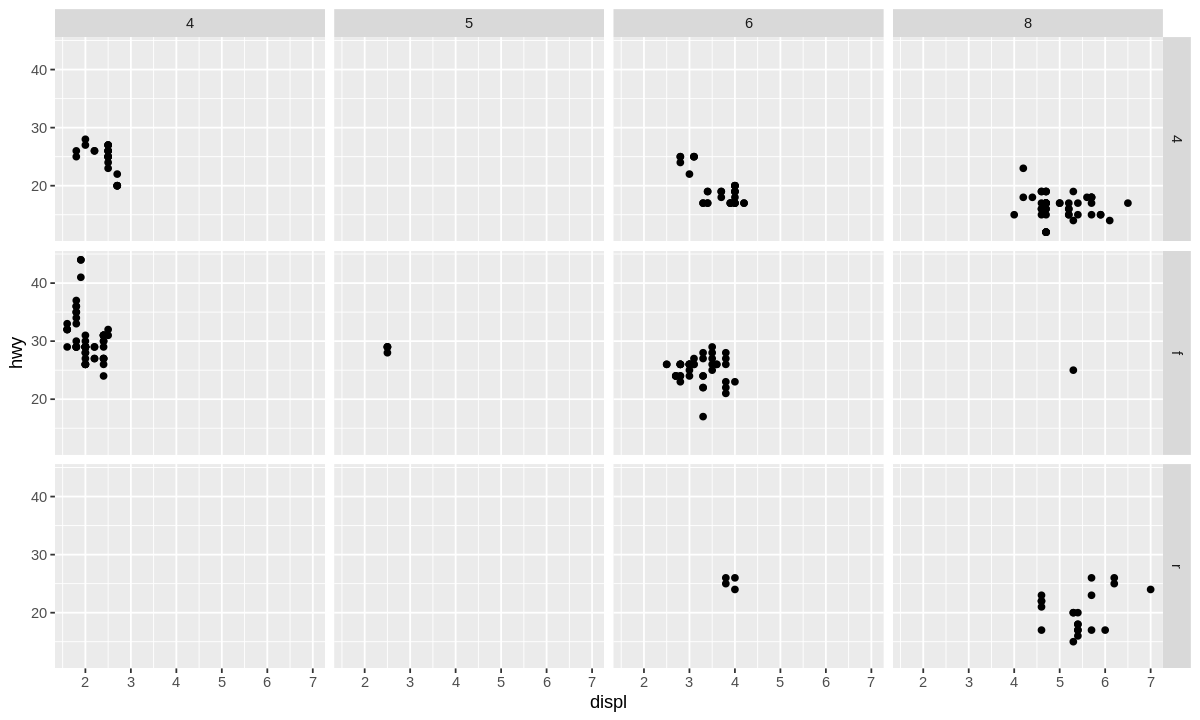

In [40]:
ggplot(data=mpg) + geom_point(aes(x=displ, y=hwy)) +
  facet_wrap(~class, nrow=3)
ggplot(data=mpg) + geom_point(aes(x=displ, y=hwy)) +
  facet_grid(drv~cyl)  

## 3. 막대그래프

In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


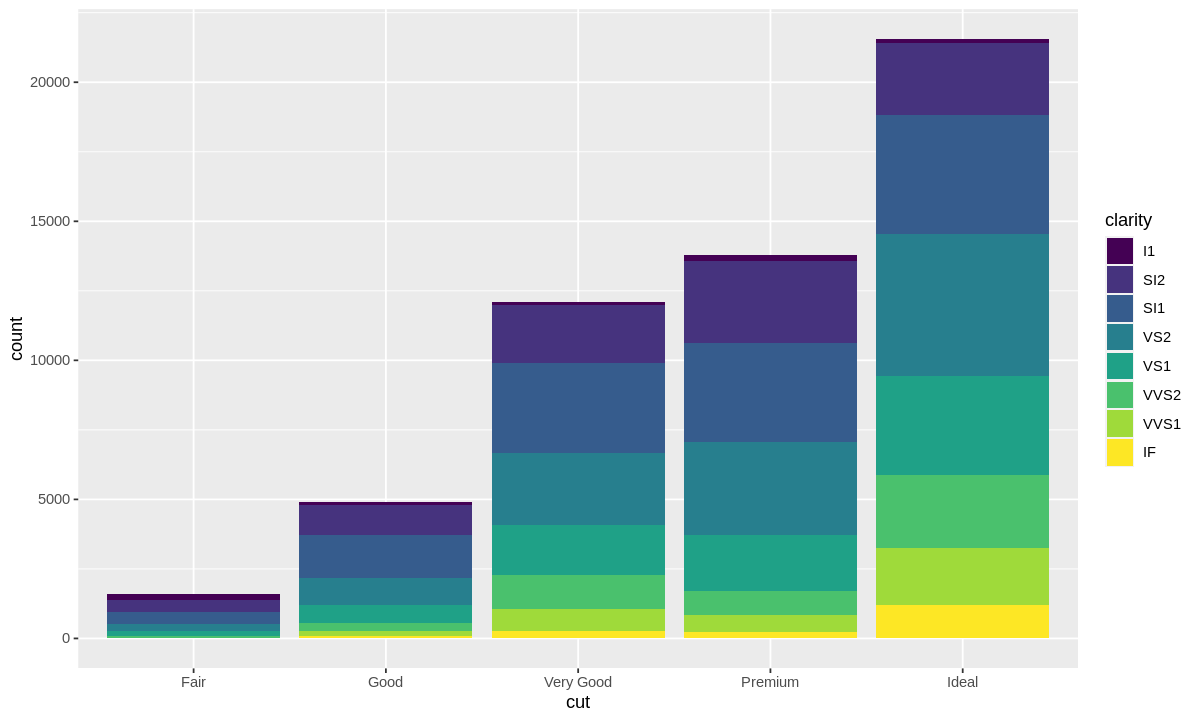

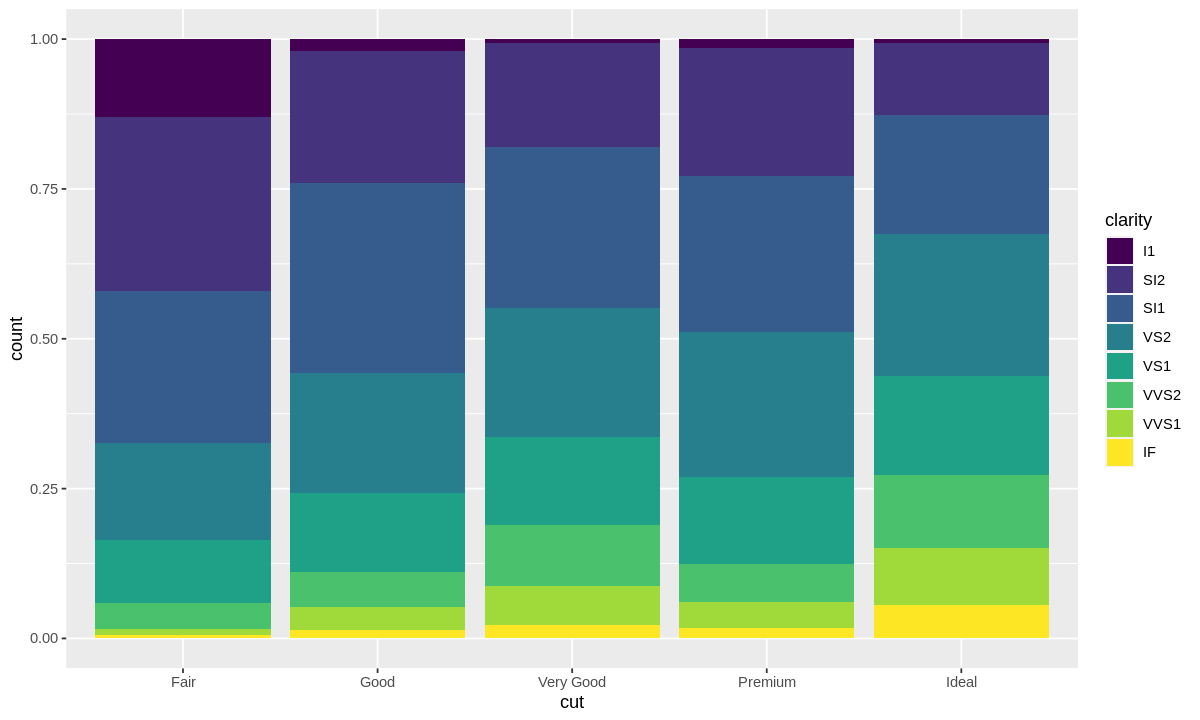

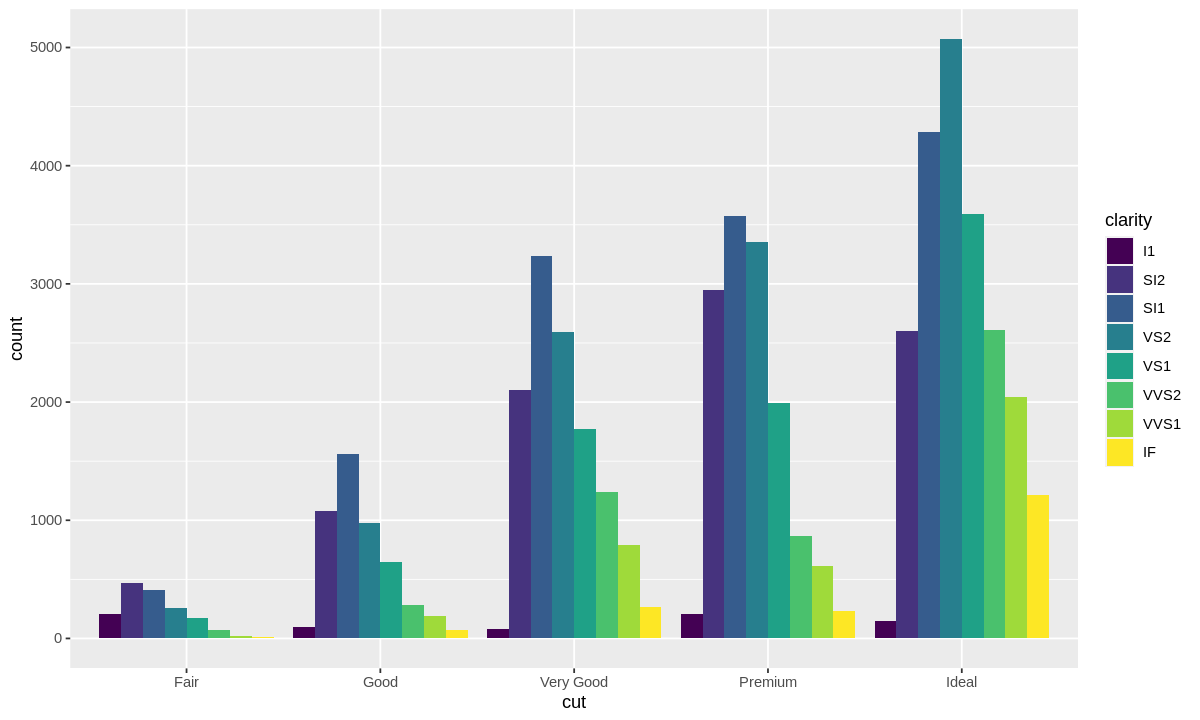

In [41]:
ggplot(data=diamonds) + geom_bar(aes(x=cut, fill=clarity))
ggplot(data=diamonds) + geom_bar(aes(x=cut, fill=clarity), position="fill")
ggplot(data=diamonds) + geom_bar(aes(x=cut, fill=clarity), position="dodge")

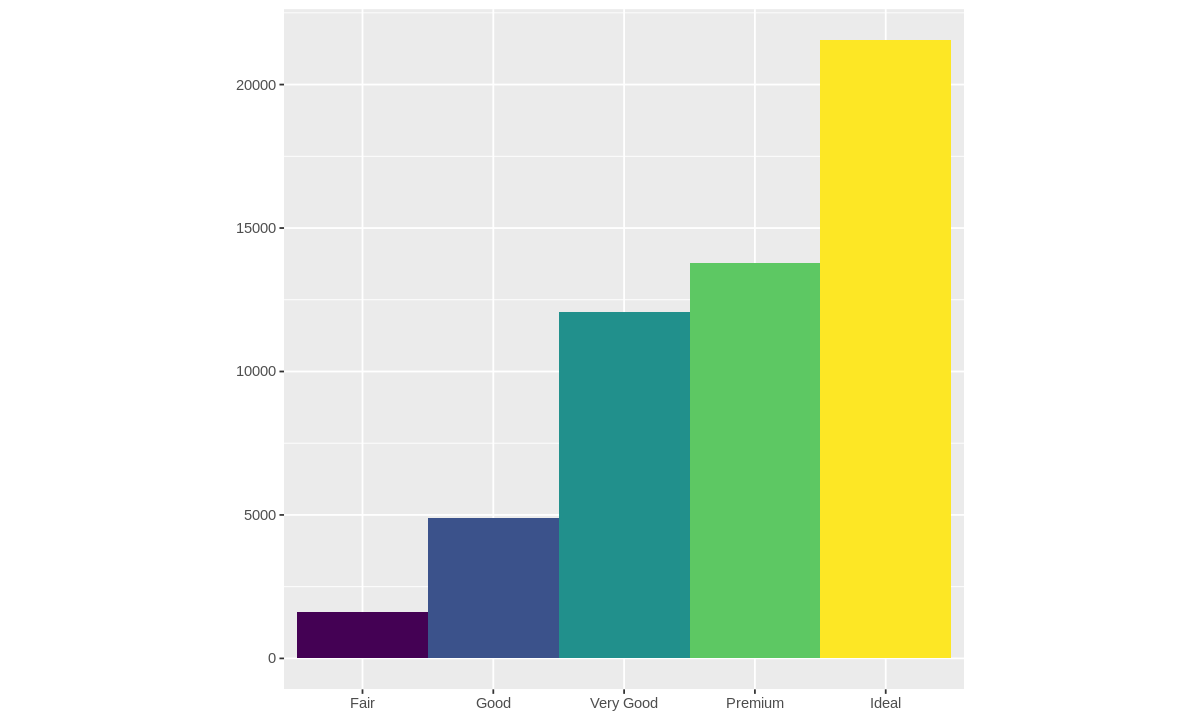

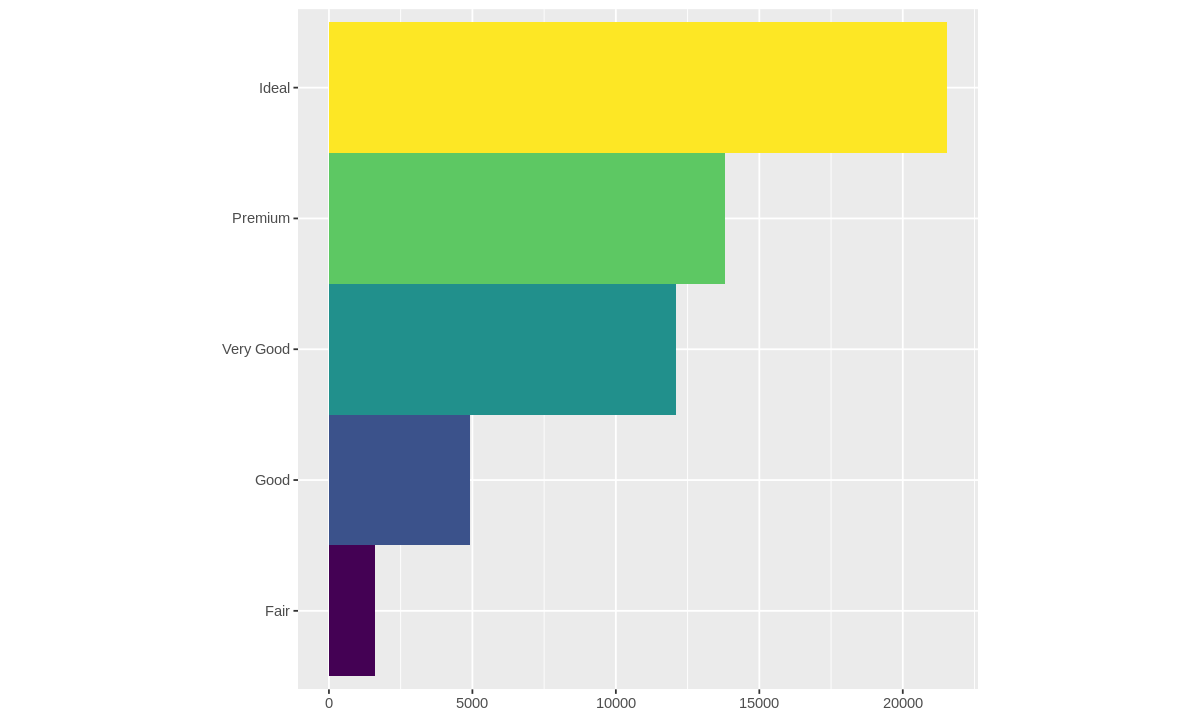

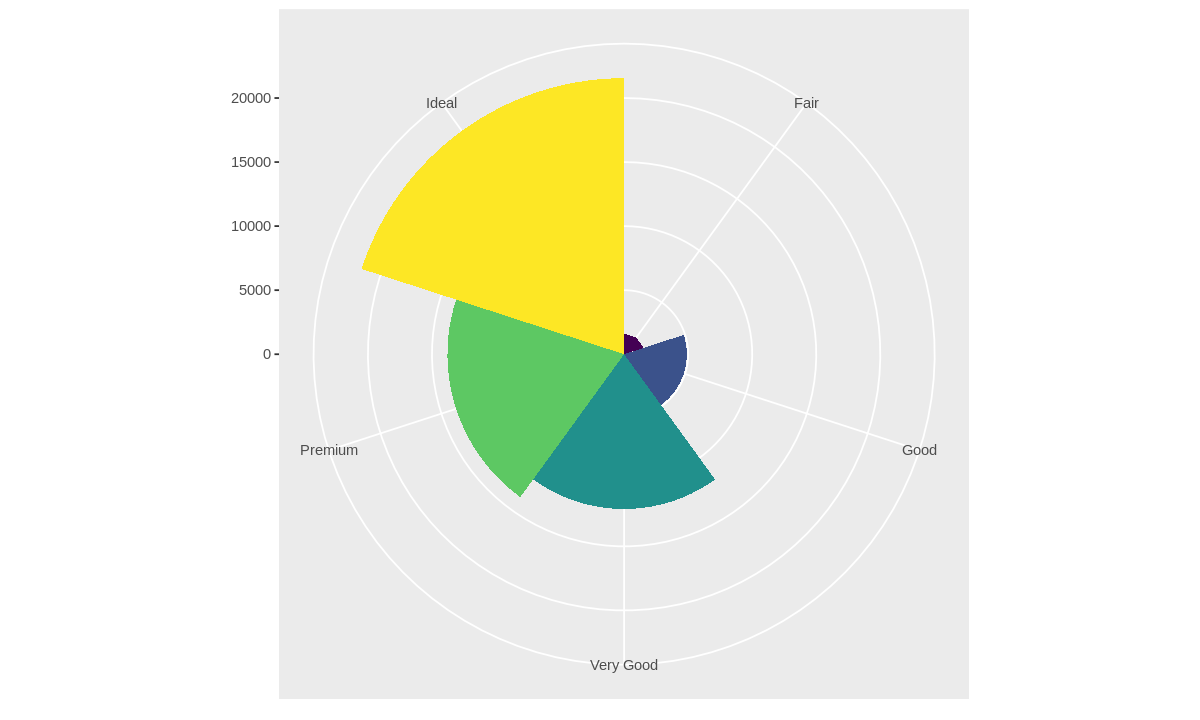

In [45]:
bar <- ggplot(data=diamonds) + 
      geom_bar(aes(x=cut, fill=cut),
      show.legend = FALSE, width=1) +
      theme(aspect.ratio = 1) +
      labs(x = NULL, y = NULL)
bar
bar + coord_flip()
bar + coord_polar()  

## 4. 지도의 작성

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



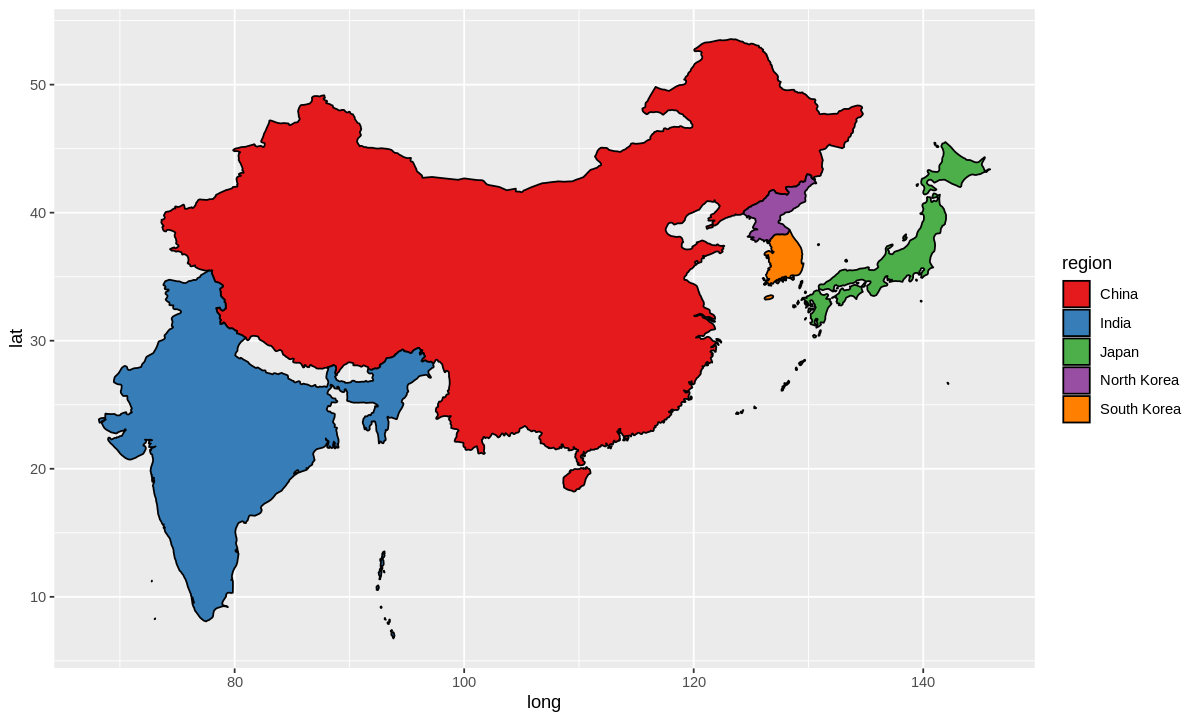

In [44]:
install.packages("maps")
library(maps)
asia <- map_data("world", region = c("China","Japan","North Korea",
                                     "South Korea", "India"))
ggplot(asia, aes(x=long, y=lat, group=group, fill=region)) + 
  geom_polygon(colour="black") + scale_fill_brewer(palette="Set1")